## Observations and Insights 

In [212]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview

combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [195]:
# Checking the number of mice.

count = combined_df["Mouse ID"].count()
print(f"Number of Mice: {count}")

unique_count = len(combined_df["Mouse ID"].unique())
print(f"Number of Unique Mice: {unique_count}")


Number of Mice: 1893
Number of Unique Mice: 249


In [196]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_group = combined_df.groupby(["Mouse ID"])
mouse_count = mouse_group["Mouse ID"].value_counts()
mouse_count



Mouse ID  Mouse ID
a203      a203        10
a251      a251        10
a262      a262        10
a275      a275        10
a366      a366         7
                      ..
z435      z435         3
z578      z578        10
z581      z581        10
z795      z795        10
z969      z969        10
Name: Mouse ID, Length: 249, dtype: int64

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [197]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_df = combined_df.drop_duplicates(subset=["Mouse ID"], keep="first", ignore_index=True)
dropped_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s185,Capomulin,Female,3,17,0,45.0,0
2,x401,Capomulin,Female,16,15,0,45.0,0
3,m601,Capomulin,Male,22,17,0,45.0,0
4,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,0,45.0,0
245,z435,Propriva,Female,12,26,0,45.0,0
246,z581,Infubinol,Female,24,25,0,45.0,0
247,z795,Naftisol,Female,13,29,0,45.0,0


In [198]:
# Checking the number of mice in the clean DataFrame.

dropped_count = len(dropped_df["Mouse ID"].unique())
print(f"Number of Unique Mice: {dropped_count}")

dropped_df["Mouse ID"].count()

Number of Unique Mice: 249


249

## Summary Statistics

In [199]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

stats_df = combined_df.describe()
# print(stats_df)


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

drug_group = combined_df.groupby("Drug Regimen")




# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_mean = drug_group["Tumor Volume (mm3)"].mean()
drug_df = pd.DataFrame(drug_mean)

# median
drug_df["Median Tumor Volume"] = drug_group["Tumor Volume (mm3)"].median()

# variance

drug_df["Tumor Volume Variance"] = drug_group["Tumor Volume (mm3)"].var()

# Standard Deviation

drug_df["Tumor Volume Std. Dev."] = drug_group["Tumor Volume (mm3)"].std()

# SEM

drug_df["Tumor Volume Std. Err."] = drug_group["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.

drug_df = drug_df.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})
drug_df
                

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

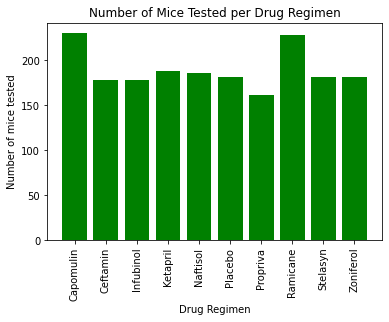

In [200]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_df["Mouse Count"] = drug_group["Tumor Volume (mm3)"].count()
drug_df

x_axis = drug_df.index
y_axis = drug_df["Mouse Count"]

plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")

plt.bar(x_axis,y_axis,color="green", align="center")
plt.xticks(rotation=90)
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

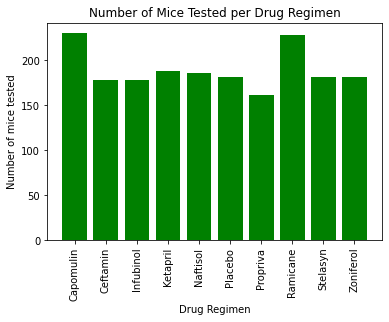

In [201]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_df["Mouse Count"] = drug_group["Tumor Volume (mm3)"].count()
drug_df

x_axis = drug_df.index
y_axis = drug_df["Mouse Count"]

plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")

plt.bar(x_axis,y_axis,color="green", align="center")
plt.xticks(rotation=90)
plt.show


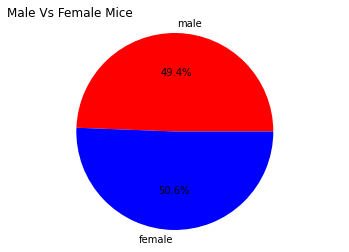

In [202]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group = combined_df.groupby("Sex").count()
gender_group

gender = ["male", "female"]
colors = ["red", "blue"]
gender_count = gender_group["Mouse ID"]



plt.pie(gender_count, labels=gender, colors=colors, autopct="%1.1f%%")
plt.title("Male Vs Female Mice", loc="left")
plt.axis("equal")

plt.show()

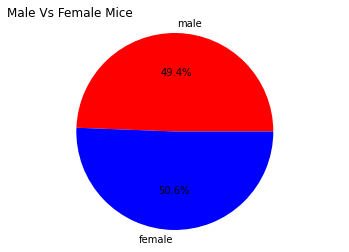

In [203]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_group = combined_df.groupby("Sex").count()
gender_group

gender = ["male", "female"]
colors = ["red", "blue"]
gender_count = gender_group["Mouse ID"]



plt.pie(gender_count, labels=gender, colors=colors, autopct="%1.1f%%")
plt.title("Male Vs Female Mice", loc="left")
plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [204]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
sorted_df = combined_df.sort_values(by=["Mouse ID","Timepoint"], axis=0)
sorted_df.head(200)

# Start by getting the last (greatest) timepoint for each mouse
last_df = sorted_df.drop_duplicates(subset=["Mouse ID"], keep="last", ignore_index=True)
last_df

last_tumor_df = last_df.drop(["Drug Regimen","Sex","Age_months","Weight (g)","Metastatic Sites"], axis=1)
last_tumor_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_df = pd.merge(dropped_df, last_tumor_df, on="Mouse ID")
renamed_df = merged_df.rename(columns={"Timepoint_x":"Initial Timepoint", "Tumor Volume (mm3)_x":"Initial Tumor Volume",
                                       "Tumor Volume (mm3)_y":"Final Tumor Volume","Timepoint_y":"Final Timepoint"})

renamed_df
drug_sorted_df = renamed_df.sort_values(by=["Drug Regimen"], axis=0)
drug_sorted_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Initial Timepoint,Initial Tumor Volume,Metastatic Sites,Final Timepoint,Final Tumor Volume
30,b742,Capomulin,Male,7,21,0,45.0,0,45,38.939633
45,i557,Capomulin,Female,1,24,0,45.0,0,45,47.685963
40,r944,Capomulin,Male,12,25,0,45.0,0,45,41.581521
39,l509,Capomulin,Male,17,21,0,45.0,0,45,41.483008
38,s710,Capomulin,Female,1,23,0,45.0,0,45,40.728578
...,...,...,...,...,...,...,...,...,...,...
84,d133,Zoniferol,Male,5,30,0,45.0,0,0,45.000000
154,n967,Zoniferol,Male,11,27,0,45.0,0,15,49.825004
85,d164,Zoniferol,Male,21,28,0,45.0,0,10,47.474645
143,m331,Zoniferol,Female,19,26,0,45.0,0,15,52.110088


In [205]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_volume = drug_sorted_df["Final Tumor Volume"]
quartiles = tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volumes is: {lowerq}")
print(f"The upper quartile of final tumor volumes is: {upperq}")
print(f"The interquartile range of final tumor volumes is: {iqr}")
print(f"The the median of final tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

     
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of final tumor volumes is: 45.93471217
The upper quartile of final tumor volumes is: 64.95756185
The interquartile range of final tumor volumes is: 19.022849680000007
The the median of final tumor volumes is: 55.84141007 
Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


SyntaxError: invalid syntax (<unknown>, line 1)

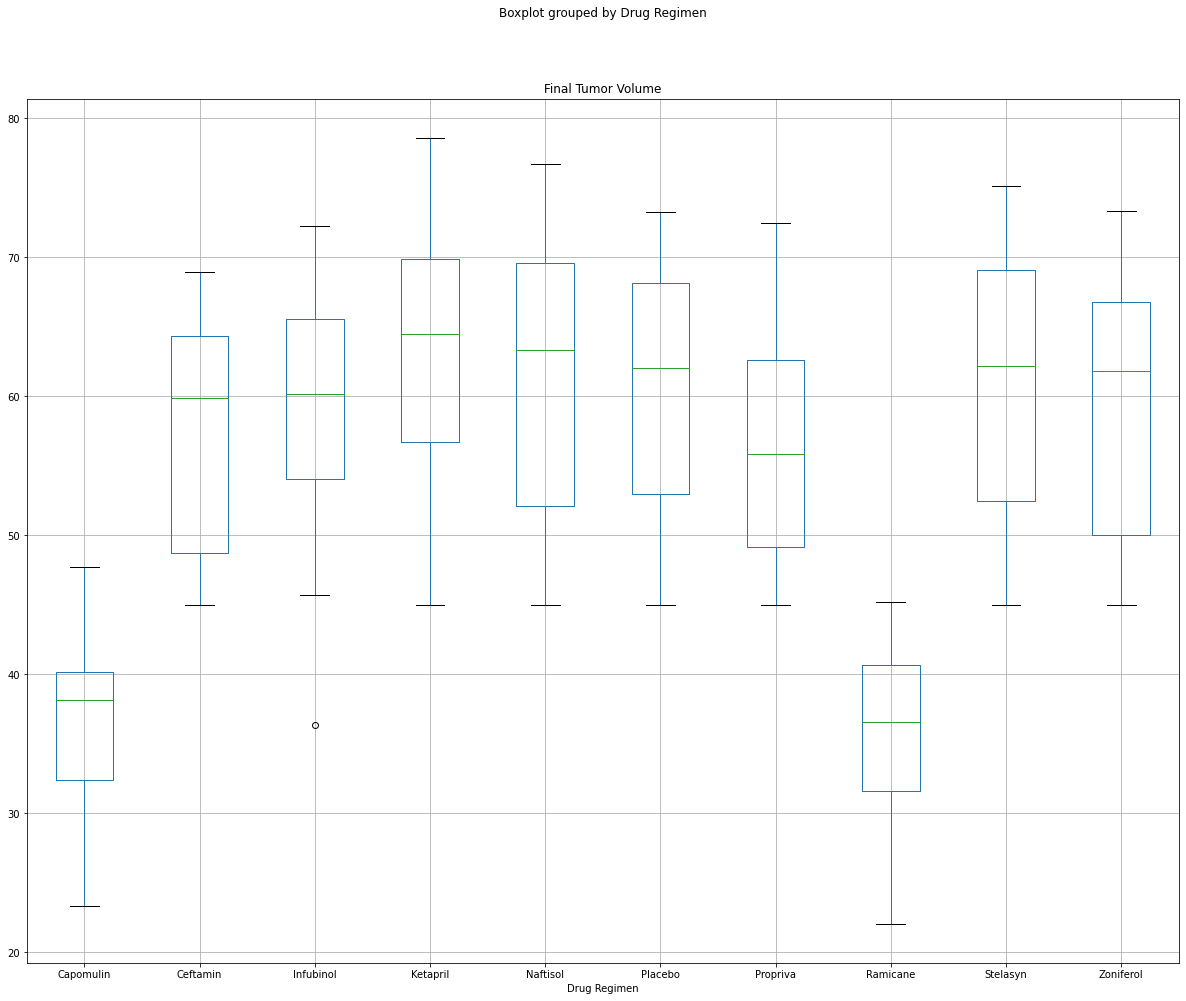

In [206]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug_sorted_df.boxplot(column="Final Tumor Volume",by ="Drug Regimen", figsize=(20,16))
drug_names = drug_sorted_df["Drug Regimen"].unique()

for i in range(len(drug_names)):
    y = drug_sorted_df.query(f"Drug Regimen == {drug_names[i]}")["Tumor Volume(mm3)"]
    x = np.random.normal(1+i, 0.04, size=y.shape[0])
    plt.plot(x,y,"r", alpha=0.2, markersize=10)

plt.xticks(rotation=45)    
plt.show()


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

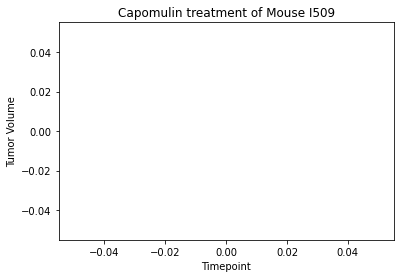

In [219]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_index = combined_df.loc[combined_df['Mouse ID'] =="I509"]
mouse_index

capomulin_df = mouse_index.loc[mouse_index['Drug Regimen'] =="Capomulin"]
capomulin_df

x_axis = capomulin_df["Timepoint"]
y_axis = capomulin_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of Mouse I509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.plot(x_axis, y_axis, marker="+",color="blue", linewidth=1, label="Fahreneit")
plt.show




In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
